## Python version of all the results in Brain Lateralization Project
Author: Yile Wang  
Date: 02/13/2023

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
import statsmodels
from tools.statools import stats_calculator

In [10]:
# import sys
# sys.path.insert(0, '/Users/yat-lok/workspaces/tvbtools')
# print(sys.path)

In [11]:
## Read data
freq3mins = pd.read_excel('../../data4project/lateralization/gc3mins/freqres.xlsx')
amp3mins = pd.read_excel('../../data4project/lateralization/gc3mins/ampres.xlsx')
delay3mins = pd.read_excel('../../data4project/lateralization/gc3mins/delayres.xlsx')
la3mins = pd.read_excel('../../data4project/lateralization/gc3mins/la3mins.xlsx')
colorcoding = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
order = ['SNC', 'NC', 'MCI', 'AD']
pairs = [('SNC', 'AD'),('NC', 'AD'), ('MCI', 'AD'), ('SNC', 'MCI'), ('NC', 'MCI'), ('SNC', 'NC')]
pairs = [('SNC', 'AD'),('NC', 'AD'), ('MCI', 'AD')]


In [19]:
stats_calculator(datatable=freq3mins)

,"(SNC, NC)","(SNC, MCI)","(SNC, AD)","(NC, MCI)","(NC, AD)","(MCI, AD)"
freq_gamma_left,0.801220,0.601020,0.190781,0.190781,0.056994,0.129287
freq_gamma_right,0.894611,0.575342,0.294421,0.136486,0.02339766*,0.294421
freq_theta_left,0.767523,0.500230,0.148385,0.183282,0.070193,0.148385
freq_theta_right,0.939406,0.578942,0.578942,0.141586,0.141586,0.677572


In [13]:
stats_calculator(datatable=amp3mins)

,"(SNC, NC)","(SNC, MCI)","(SNC, AD)","(NC, MCI)","(NC, AD)","(MCI, AD)"
amp_gamma_left,0.602240,0.326847,0.287221,0.287221,0.287221,0.287221
amp_gamma_right,0.990801,0.990801,0.990801,0.990801,0.990801,0.990801
amp_theta_right,0.791821,0.672293,0.672293,0.672293,0.672293,0.672293
amp_theta_left,0.781022,0.466633,0.257374,0.257374,0.146385,0.257374


In [15]:
stats_calculator(datatable=delay3mins, tails='less')

,"(SNC, NC)","(SNC, MCI)","(SNC, AD)","(NC, MCI)","(NC, AD)","(MCI, AD)"
pcg_delay,0.70298,0.911409,0.118388,0.911409,0.118388,0.00059994***


In [20]:
stats_calculator(datatable=la3mins, tails='less')

,"(SNC, NC)","(SNC, MCI)","(SNC, AD)","(NC, MCI)","(NC, AD)","(MCI, AD)"
LI_amp_gamma,0.558344,0.226057,0.226057,0.226057,0.226057,0.226057
LI_amp_theta,0.727427,0.356964,0.331567,0.266073,0.208179,0.356964
LI_freq_gamma,0.798420,0.722088,0.218378,0.318118,0.079192,0.133187
LI_freq_theta,0.696730,0.422118,0.191781,0.211179,0.095990,0.191781


In [ ]:
### violin plot visualization
def violin_dot(data, x, y, xlabel = 'Group', ylabel='Count', pairs=pairs, order=order):
    fig = plt.figure()
    sns.set_theme()
    plt.box(False) #remove box
    
    
    plt.tick_params(left=False, labelleft=False, bottom=False) #remove ticks
    ax = sns.stripplot(data = data, x=x, y=y, edgecolor="black", linewidth=2, palette=colorcoding, alpha = 0.7)
    sns.violinplot(data = data, x=x, y = y, inner=None, bw=.5, palette=colorcoding, linewidth=3)
    sns.pointplot(data=data, x = x, y=y, estimator=np.mean, color="red", ci=None, join=False, markers='s')
    annotator = Annotator(ax, pairs=pairs, data=data, x=x, y=y, order=order, plot='violinplot')
    annotator.configure(test='Mann-Whitney', comparisons_correction="BH", text_format='star', loc='inside')
    annotator.apply_and_annotate()
    plt.xlabel(y)
    plt.ylabel(ylabel)
    #plt.title()

# def violin_dodge(data, x, y):
    

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MCI vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.367e-02 U_stat=3.020e+02
NC vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.360e-02 U_stat=1.605e+02
SNC vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.414e-01 U_stat=8.900e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

MCI vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.094e-01 U_stat=2.970e+02
NC vs. AD: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.168e-02 U_stat=1.620e+02
SNC vs. AD: Mann-Whitney-Wilcoxon test two-sided w

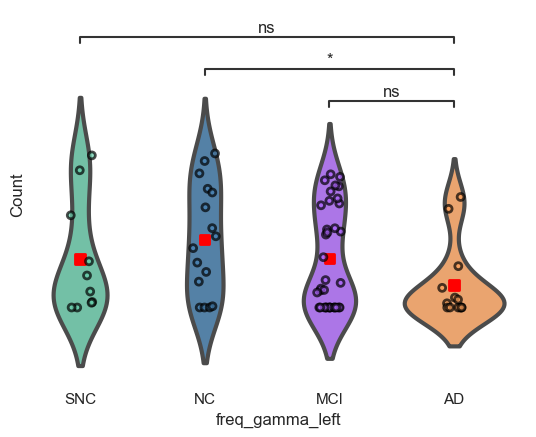

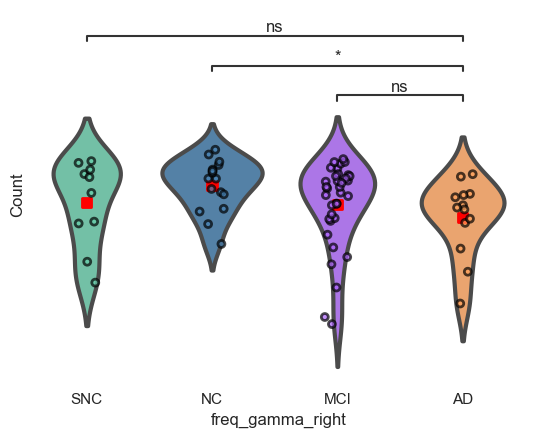

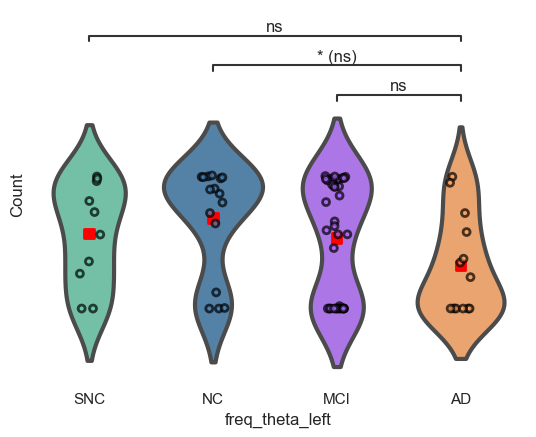

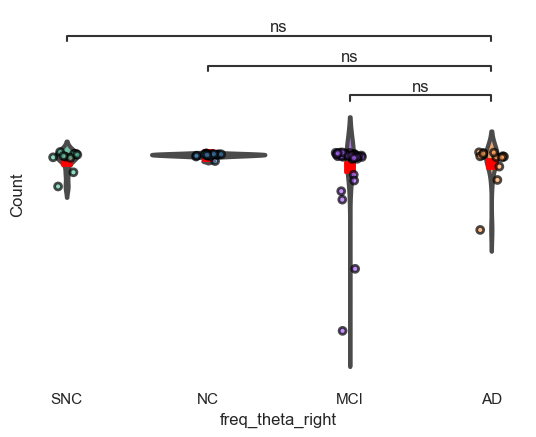

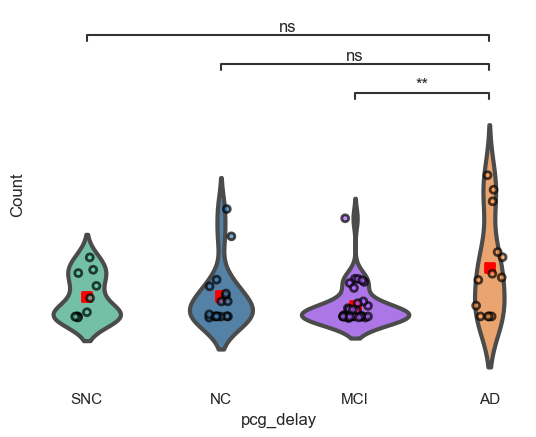

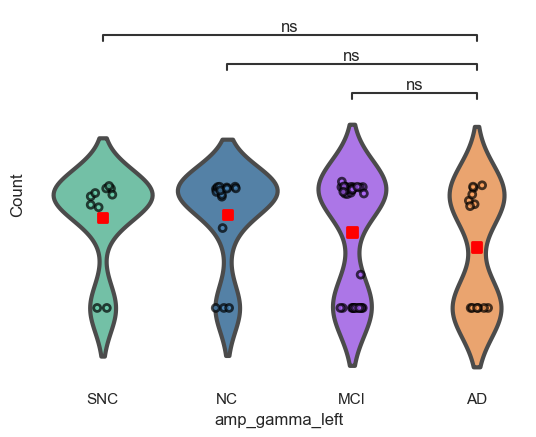

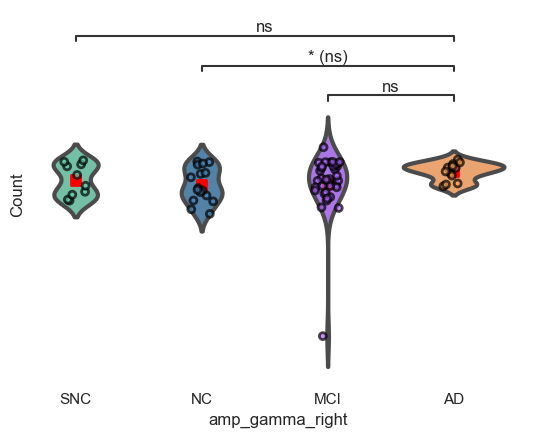

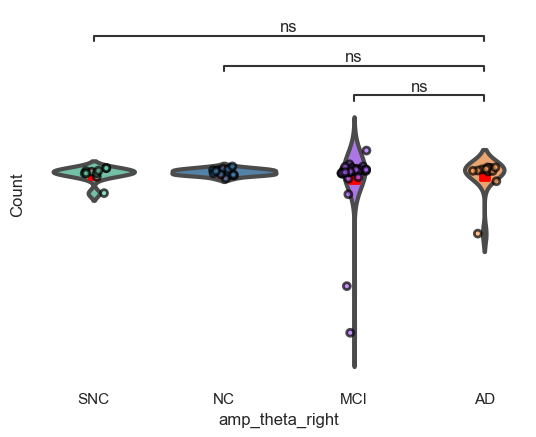

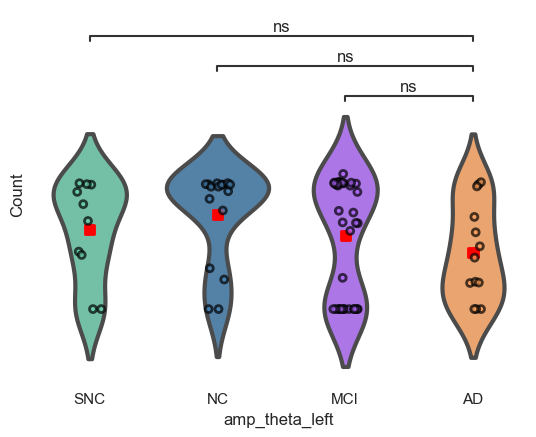

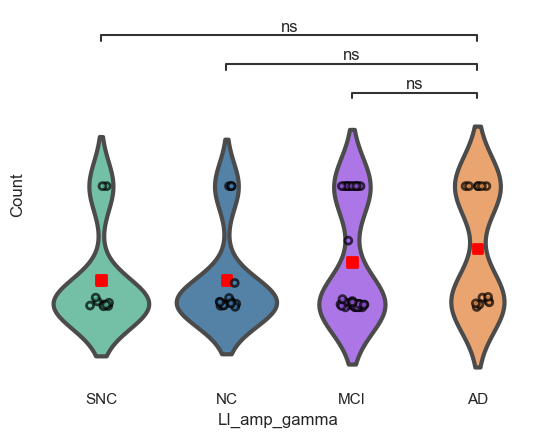

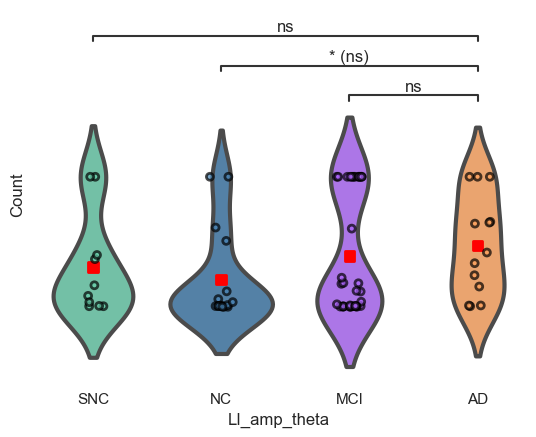

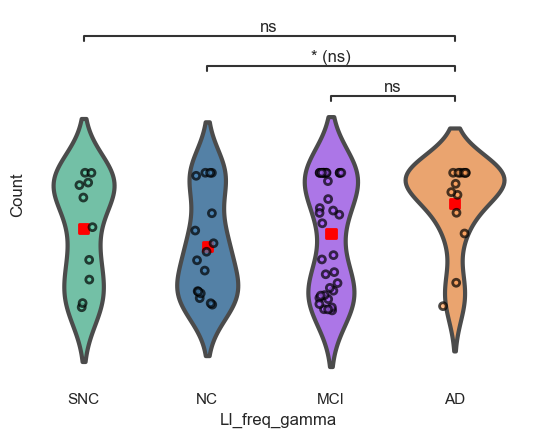

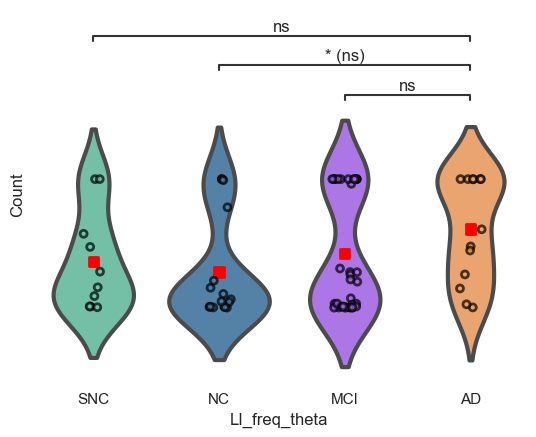

In [ ]:
for i in range(len(freq3mins.columns)-2):
    violin_dot(freq3mins, "group", freq3mins.columns[i+2])
for i in range(len(delay3mins.columns)-2):
    violin_dot(delay3mins, "group", delay3mins.columns[i+2])
for i in range(len(amp3mins.columns)-2):
    violin_dot(amp3mins, "group", amp3mins.columns[i+2])
for i in range(len(la3mins.columns)-2):
    violin_dot(la3mins, "group", la3mins.columns[i+2])